In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import os


In [8]:
data = pd.read_csv("Data/Mushrooms.csv")

In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
# missing data
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

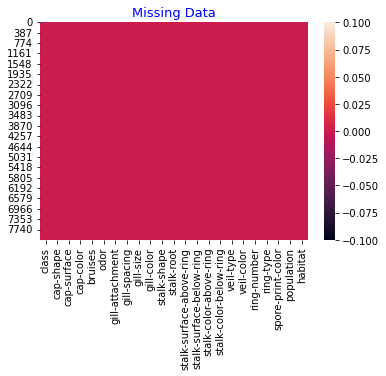

In [12]:
sns.heatmap(data.isnull())
plt.title("Missing Data",fontsize=(13),color="blue")
plt.show()

In [13]:
data["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

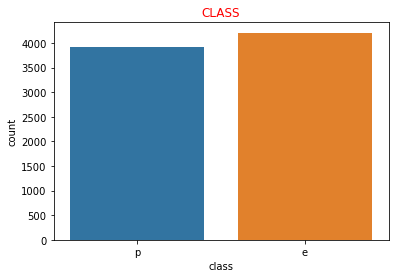

In [14]:
sns.countplot(data["class"])
plt.title("CLASS",color = "red")
plt.show()

In [15]:
# data summary 
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data = data.apply(lb.fit_transform)

In [18]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [19]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


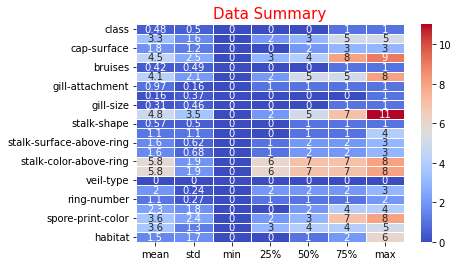

In [20]:
sns.heatmap(data.describe()[1:].transpose(),annot=True,linewidths=.5,linecolor="white",cmap="coolwarm")
plt.title("Data Summary",fontsize=(15),color="red")
plt.show()

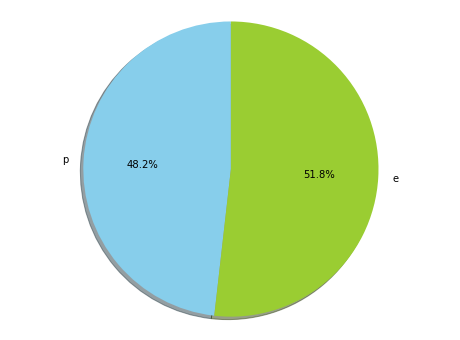

In [21]:
p =len(data[data['class'] == 1])
e = len(data[data['class']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'p','e' #p = poisonous & e = edible
sizes = [p,e]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

In [22]:
data.habitat.unique()

array([5, 1, 3, 0, 4, 6, 2], dtype=int64)

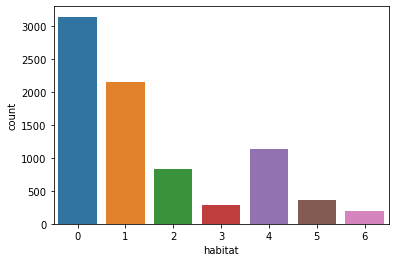

In [23]:
sns.countplot(data.habitat)
plt.show()

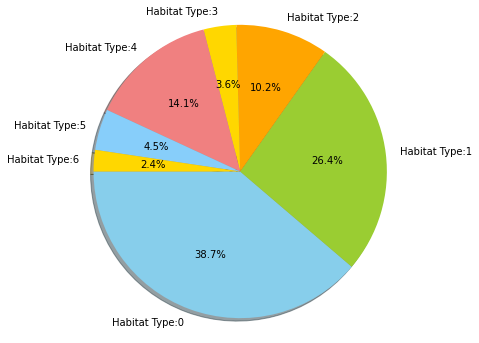

In [24]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Habitat Type:0','Habitat Type:1','Habitat Type:2','Habitat Type:3','Habitat Type:4','Habitat Type:5',"Habitat Type:6"
sizes = [len(data[data['habitat'] == 0]),len(data[data['habitat'] == 1]),
         len(data[data['habitat'] == 2]),
         len(data[data['habitat'] == 3]),
         len(data[data["habitat"] == 4]),
         len(data[data["habitat"] == 5]),
         len(data[data["habitat"] == 6])]
         
colors = ['skyblue', 'yellowgreen','orange','gold',"lightcoral","lightskyblue","gold"]
explode = (0,0,0,0,0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

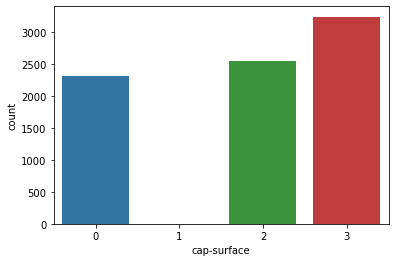

In [25]:
# countplot with cap-surface
sns.countplot(data["cap-surface"])
plt.show()

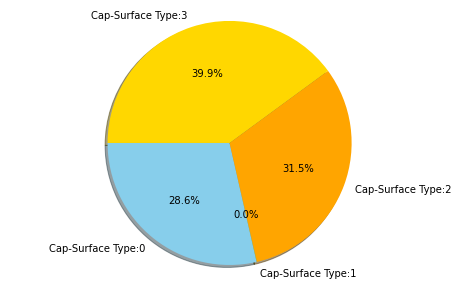

In [26]:
plt.figure(figsize=(8,5))

labels="Cap-Surface Type:0","Cap-Surface Type:1","Cap-Surface Type:2","Cap-Surface Type:3"
sizes =[len(data[data["cap-surface"]  == 0]),
        len(data[data["cap-surface"] == 1]),
        len(data[data["cap-surface"] == 2]),
        len(data[data["cap-surface"] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold',"lightcoral","lightskyblue","gold"]
explode = (0,0,0,0)

#plot
plt.pie(sizes,explode = explode , labels = labels ,colors = colors,autopct="%1.1f%%",
        shadow=True,startangle=180)
plt.axis("equal")
plt.show()

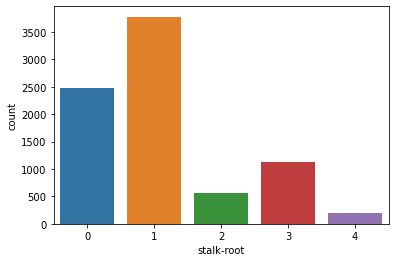

In [27]:
sns.countplot(data["stalk-root"])
plt.show()

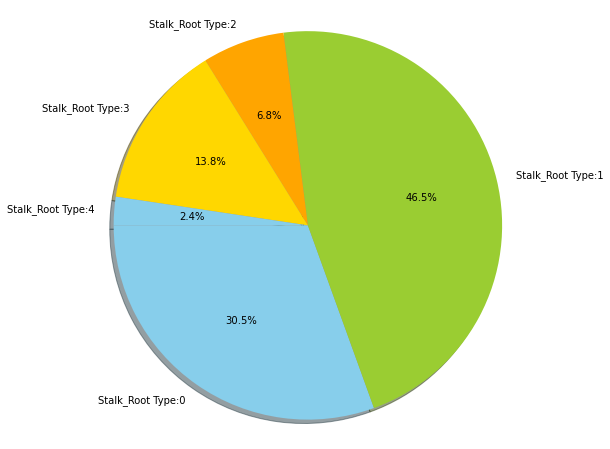

In [28]:
plt.figure(figsize=(10,8))

labels="Stalk_Root Type:0","Stalk_Root Type:1","Stalk_Root Type:2","Stalk_Root Type:3","Stalk_Root Type:4"
sizes = [len(data[data["stalk-root"] == 0]),
         len(data[data["stalk-root"] == 1]),
         len(data[data["stalk-root"] == 2]),
         len(data[data["stalk-root"] == 3]),
         len(data[data["stalk-root"] == 4])]

colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0,0,0,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=180)
plt.axis("equal")
plt.show()

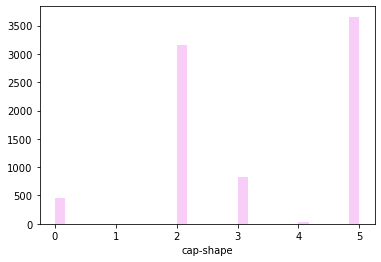

In [29]:
#displot for cap-shape
sns.distplot(data["cap-shape"],kde=False,bins=30,color="violet")
plt.show()

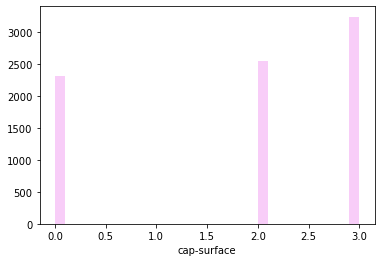

In [30]:
#displot for cap-surface
sns.distplot(data["cap-surface"],kde=False,bins=30,color="violet")
plt.show()

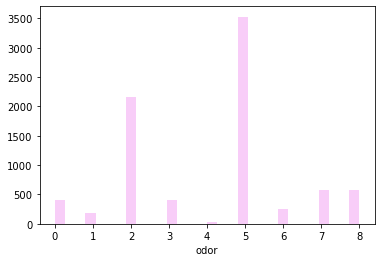

In [31]:
#displot for odor 
sns.distplot(data["odor"],kde=False,bins=30,color="violet")
plt.show()

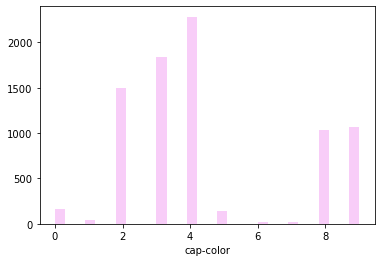

In [32]:
sns.distplot(data["cap-color"],kde=False,bins=30,color="violet")
plt.show()

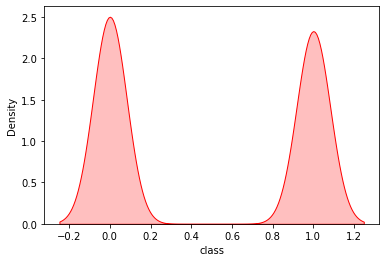

In [33]:
sns.kdeplot(data["class"],shade=True, color="r")
plt.show()

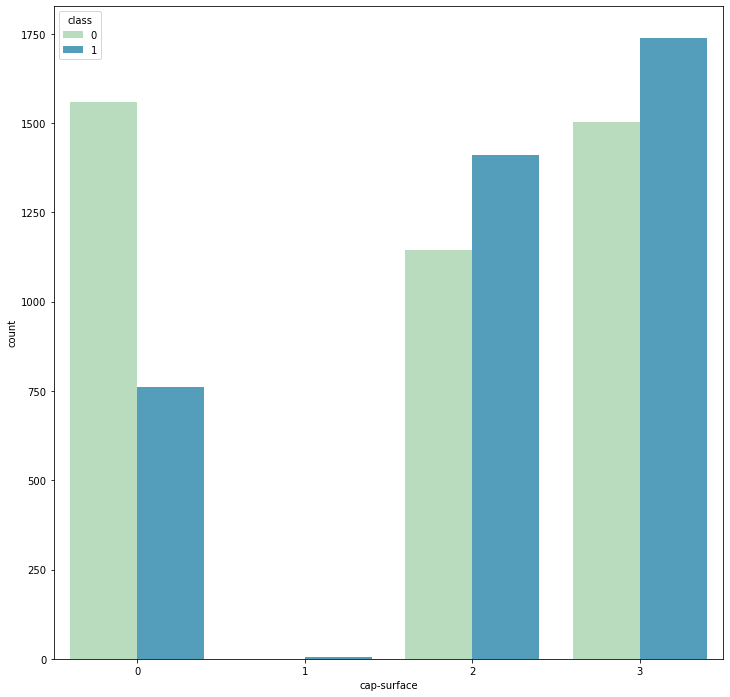

In [34]:
plt.figure(figsize=(12,12))
sns.countplot(x="cap-surface",data = data ,hue = "class", palette="GnBu")
plt.show()

In [35]:
x = data.drop(["class"],axis=1)
y = data["class"].values

In [36]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [37]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
from sklearn.model_selection import cross_val_score
accuries = cross_val_score(estimator=knn,X=x_train, y = y_train,cv=10)
print("avarge accuracy :" ,np.mean(accuries))
print("avarge std :",np.std(accuries))

avarge accuracy : 1.0
avarge std : 0.0


In [40]:
knn.fit(x_train,y_train)
print("knn score :",knn.score(x_test,y_test))

knn score : 1.0


In [41]:
predictions = knn.predict(x_test)

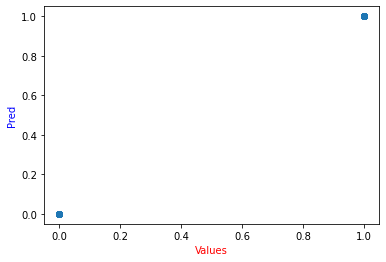

In [42]:
plt.scatter(y_test, predictions)
plt.xlabel("Values",color = "red")
plt.ylabel("Pred",color = "blue")
plt.show()